# Problem


To understand the patterns of giving credit to users.


Which features or attributes is important to give credit (loan)

# Understand the data
Age (numeric)

Sex (text: male, female)

Job (numeric: 0 - unskilled and non-resident, 1 - unskilled and resident, 2 - skilled, 3 - highly skilled)

Housing (text: own, rent, or free)

Saving accounts (text - little, moderate, quite rich, rich)

Checking account (numeric, in DM - Deutsch Mark)

Credit amount (numeric, in DM)

Duration (numeric, in month)

Purpose (text: car, furniture/equipment, radio/TV, domestic appliances, repairs, education, business, vacation/others)

In [30]:
#importing neccessarily libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [31]:
#load the german_dataset csv file into german_data variable
german_data = pd.read_csv("/content/german_credit_data.csv")

In [32]:
#check the top 5 records in my german_dataset
german_data.head()

,Unnamed: 0,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose
0,0,67,male,2,own,NaN,little,1169,6,radio/TV
1,1,22,female,2,own,little,moderate,5951,48,radio/TV
2,2,49,male,1,own,little,NaN,2096,12,education
3,3,45,male,2,free,little,little,7882,42,furniture/equipment
4,4,53,male,2,free,little,little,4870,24,car


In [33]:
#data cleaning
#checking if there are missing data
german_data.isnull().sum()

Unnamed: 0            0
Age                   0
Sex                   0
Job                   0
Housing               0
Saving accounts     183
Checking account    394
Credit amount         0
Duration              0
Purpose               0
dtype: int64

In [34]:
#check the info
german_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Unnamed: 0        1000 non-null   int64 
 1   Age               1000 non-null   int64 
 2   Sex               1000 non-null   object
 3   Job               1000 non-null   int64 
 4   Housing           1000 non-null   object
 5   Saving accounts   817 non-null    object
 6   Checking account  606 non-null    object
 7   Credit amount     1000 non-null   int64 
 8   Duration          1000 non-null   int64 
 9   Purpose           1000 non-null   object
dtypes: int64(5), object(5)
memory usage: 78.2+ KB


In [35]:
german_data['Checking account'].value_counts()

Checking account
little      274
moderate    269
rich         63
Name: count, dtype: int64

In [38]:
#filling with the mode
german_data['Checking account'] = german_data['Checking account'].fillna(german_data['Checking account'].mode()[0])

In [39]:
german_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Unnamed: 0        1000 non-null   int64 
 1   Age               1000 non-null   int64 
 2   Sex               1000 non-null   object
 3   Job               1000 non-null   int64 
 4   Housing           1000 non-null   object
 5   Saving accounts   817 non-null    object
 6   Checking account  1000 non-null   object
 7   Credit amount     1000 non-null   int64 
 8   Duration          1000 non-null   int64 
 9   Purpose           1000 non-null   object
dtypes: int64(5), object(5)
memory usage: 78.2+ KB


In [40]:
german_data.isnull().sum()

Unnamed: 0            0
Age                   0
Sex                   0
Job                   0
Housing               0
Saving accounts     183
Checking account      0
Credit amount         0
Duration              0
Purpose               0
dtype: int64

In [42]:
german_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Unnamed: 0        1000 non-null   int64 
 1   Age               1000 non-null   int64 
 2   Sex               1000 non-null   object
 3   Job               1000 non-null   int64 
 4   Housing           1000 non-null   object
 5   Saving accounts   817 non-null    object
 6   Checking account  1000 non-null   object
 7   Credit amount     1000 non-null   int64 
 8   Duration          1000 non-null   int64 
 9   Purpose           1000 non-null   object
dtypes: int64(5), object(5)
memory usage: 78.2+ KB


In [43]:
#filling with the mode
german_data['Saving accounts'] = german_data['Saving accounts'].fillna(german_data['Saving accounts'].mode()[0])

In [44]:
german_data.isnull().sum()

Unnamed: 0          0
Age                 0
Sex                 0
Job                 0
Housing             0
Saving accounts     0
Checking account    0
Credit amount       0
Duration            0
Purpose             0
dtype: int64

In [45]:
german_data.drop('Unnamed: 0', axis='columns', inplace=True)

In [46]:
german_data.columns

Index(['Age', 'Sex', 'Job', 'Housing', 'Saving accounts', 'Checking account',
       'Credit amount', 'Duration', 'Purpose'],
      dtype='object')

In [47]:
#checking if all the columns has the right data type
german_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Age               1000 non-null   int64 
 1   Sex               1000 non-null   object
 2   Job               1000 non-null   int64 
 3   Housing           1000 non-null   object
 4   Saving accounts   1000 non-null   object
 5   Checking account  1000 non-null   object
 6   Credit amount     1000 non-null   int64 
 7   Duration          1000 non-null   int64 
 8   Purpose           1000 non-null   object
dtypes: int64(4), object(5)
memory usage: 70.4+ KB


In [48]:
german_data['Job'].value_counts()

Job
2    630
1    200
3    148
0     22
Name: count, dtype: int64

0 - unskilled and non-resident, 1 - unskilled and resident, 2 - skilled, 3 - highly skilled

In [49]:
german_data['Job'] = german_data['Job'].map({0: 'unskilled and non-resident',
                                             1: 'unskilled and resident',
                                             2: 'skilled',
                                             3: 'highly skilled'})

In [50]:
german_data['Job'].value_counts()

Job
skilled                       630
unskilled and resident        200
highly skilled                148
unskilled and non-resident     22
Name: count, dtype: int64

In [52]:
german_data['Job'] = german_data['Job'].apply(str)

In [53]:
german_data['Job'].value_counts()

Job
skilled                       630
unskilled and resident        200
highly skilled                148
unskilled and non-resident     22
Name: count, dtype: int64

In [54]:
german_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Age               1000 non-null   int64 
 1   Sex               1000 non-null   object
 2   Job               1000 non-null   object
 3   Housing           1000 non-null   object
 4   Saving accounts   1000 non-null   object
 5   Checking account  1000 non-null   object
 6   Credit amount     1000 non-null   int64 
 7   Duration          1000 non-null   int64 
 8   Purpose           1000 non-null   object
dtypes: int64(3), object(6)
memory usage: 70.4+ KB


<Axes: xlabel='Age', ylabel='Count'>

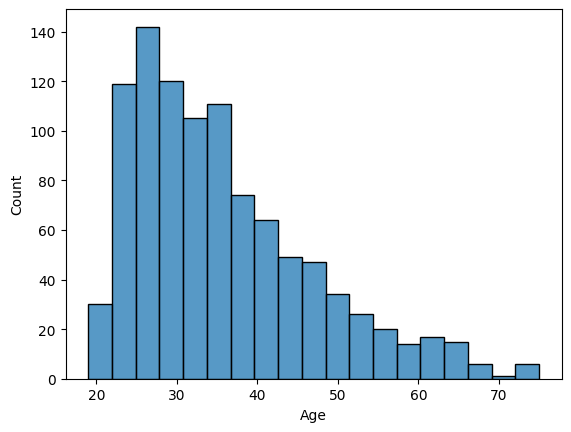

In [55]:
sns.histplot(data=german_data, x="Age")

The highest credit loan users from the dataset are within their primes, agile and industrious young (between 25-40)people because they possibly need more resources and support, while the older ones are minimal.

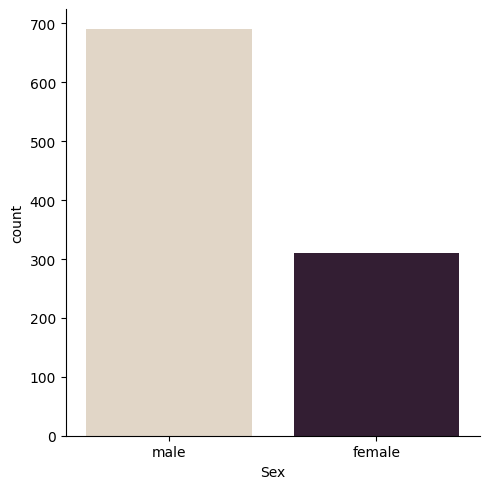

In [63]:
sns.catplot(x="Sex", kind="count", palette="ch:.25", hue='Sex', data=german_data)

We have about 700 males appyling for credit loan with about 300 females, Males tends to take more risk, and has more financial needs or responsiblities compare to female.

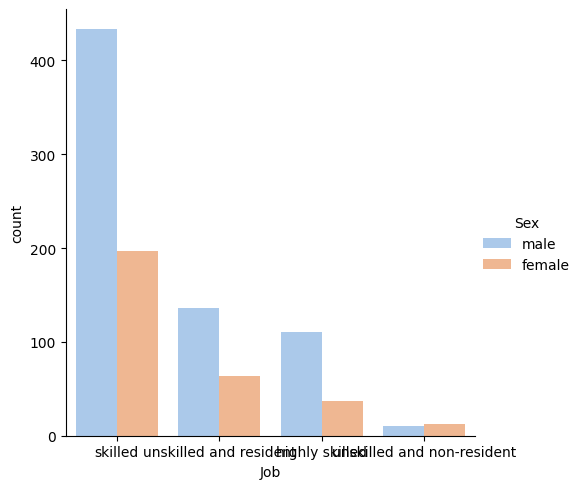

In [65]:
sns.catplot(x="Job", kind="count", palette="pastel", hue='Sex', data=german_data)

Across the different Job categories, there are more Males over female, this is also show that there are more males applying for loan or credit in the company.

In [66]:
german_data.columns

Index(['Age', 'Sex', 'Job', 'Housing', 'Saving accounts', 'Checking account',
       'Credit amount', 'Duration', 'Purpose'],
      dtype='object')

<Axes: xlabel='count', ylabel='Housing'>

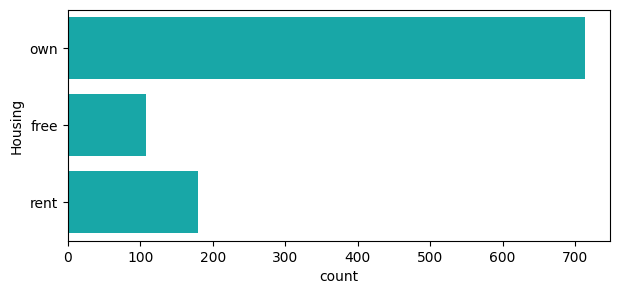

In [67]:
f, ax = plt.subplots(figsize=(7, 3))
sns.countplot(y="Housing", data=german_data, color="c")

About 700 loan borrowers, owns a house, about 200 rents an apartment, while about 100 stays in a free apartment ehich might mean that there are dependant on either parent or gudiance.

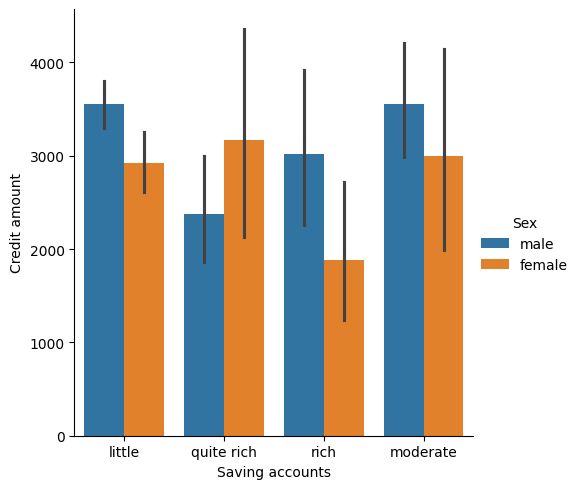

In [70]:
sns.catplot(x="Saving accounts", y="Credit amount", hue="Sex",
            kind="bar", data=german_data)

<ipython-input-74-9db0591bb3fe>:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(german_data['Credit amount'],bins=100,kde=False)


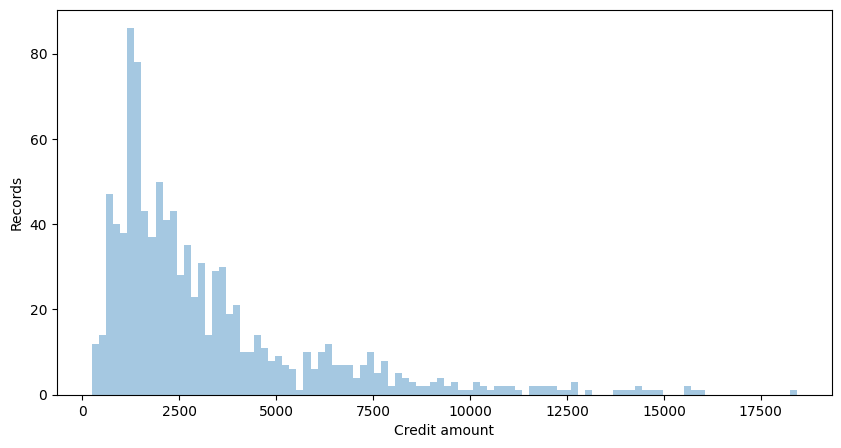

In [74]:
plt.figure(figsize=(10,5))
plt.xlabel('Credit Amount')
plt.ylabel('Records')
sns.distplot(german_data['Credit amount'],bins=100,kde=False)
plt.show()

In [75]:
german_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Age               1000 non-null   int64 
 1   Sex               1000 non-null   object
 2   Job               1000 non-null   object
 3   Housing           1000 non-null   object
 4   Saving accounts   1000 non-null   object
 5   Checking account  1000 non-null   object
 6   Credit amount     1000 non-null   int64 
 7   Duration          1000 non-null   int64 
 8   Purpose           1000 non-null   object
dtypes: int64(3), object(6)
memory usage: 70.4+ KB


<Axes: xlabel='Duration', ylabel='Count'>

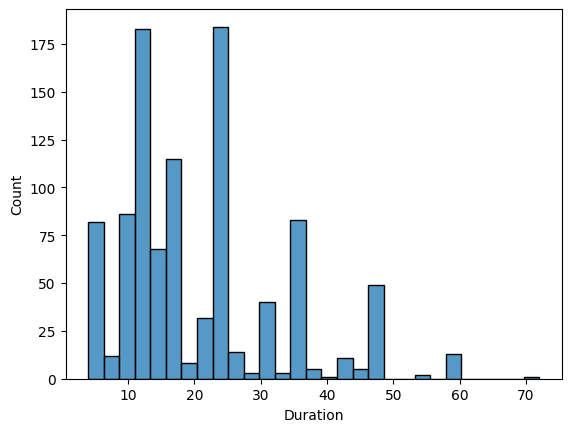

In [78]:
sns.histplot(data=german_data, x="Duration")

In [79]:
german_data.describe()

,Age,Credit amount,Duration
count,1000.000000,1000.000000,1000.000000
mean,35.546000,3271.258000,20.903000
std,11.375469,2822.736876,12.058814
min,19.000000,250.000000,4.000000
25%,27.000000,1365.500000,12.000000
50%,33.000000,2319.500000,18.000000
75%,42.000000,3972.250000,24.000000
max,75.000000,18424.000000,72.000000
